## Information About Dataset

**age:** Age of the person

**sex:** Gender of the person

**cp:** Chest Pain type chest pain type

**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholestoral in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:** resting electrocardiographic results

**thalachh:** maximum heart rate achieved

**exng:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** Previous peak

**slp:** slp

**caa:** number of major vessels (0-3)

**thall:** Thal rate

**output:** Target variable

## Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

<AxesSubplot:xlabel='output', ylabel='count'>

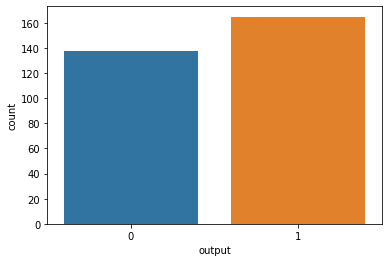

In [3]:
sns.countplot(data=data,x="output")

<AxesSubplot:xlabel='output', ylabel='count'>

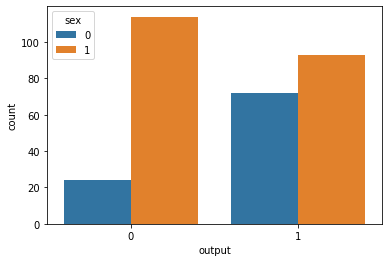

In [4]:
sns.countplot(data=data,x="output",hue="sex")

<AxesSubplot:xlabel='output', ylabel='chol'>

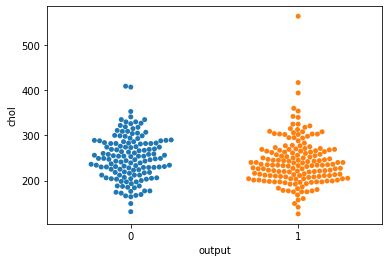

In [5]:
sns.swarmplot(x=data["output"],y=data["chol"])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

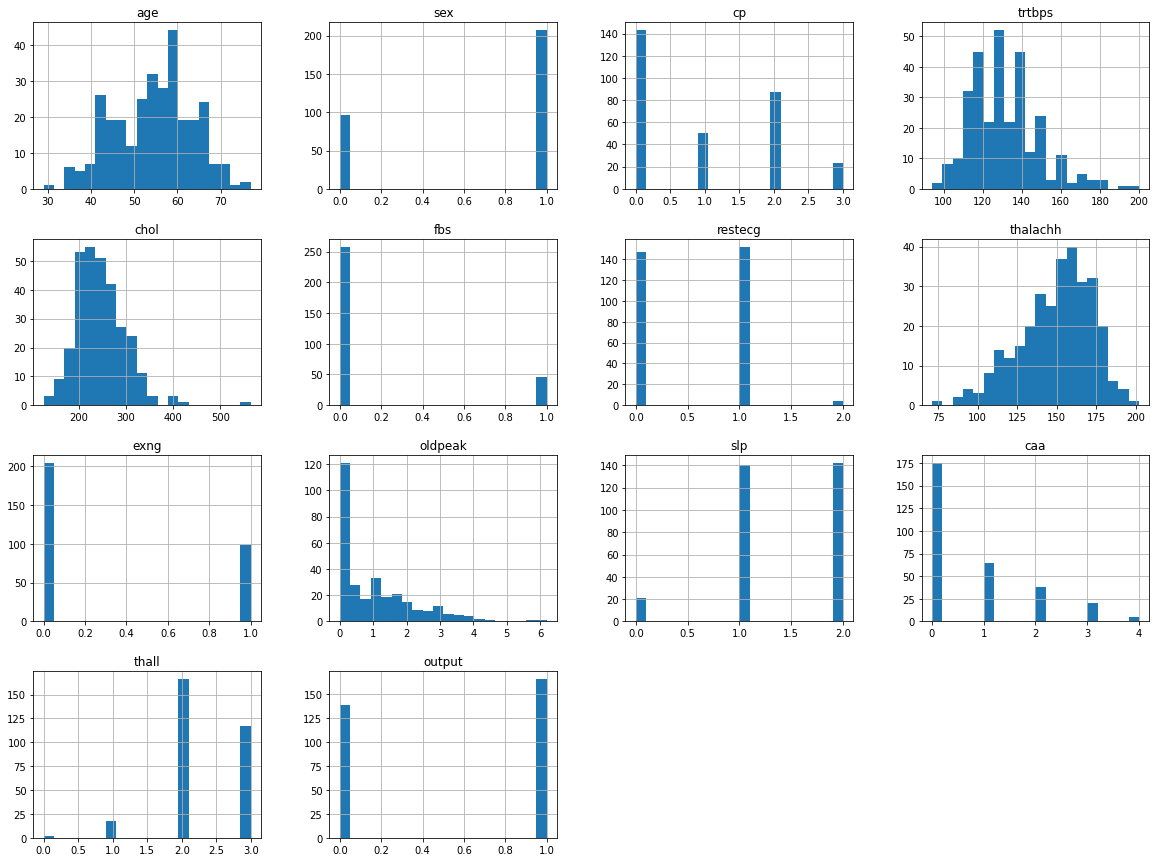

In [6]:
data.hist(figsize=(20,15),bins=20)

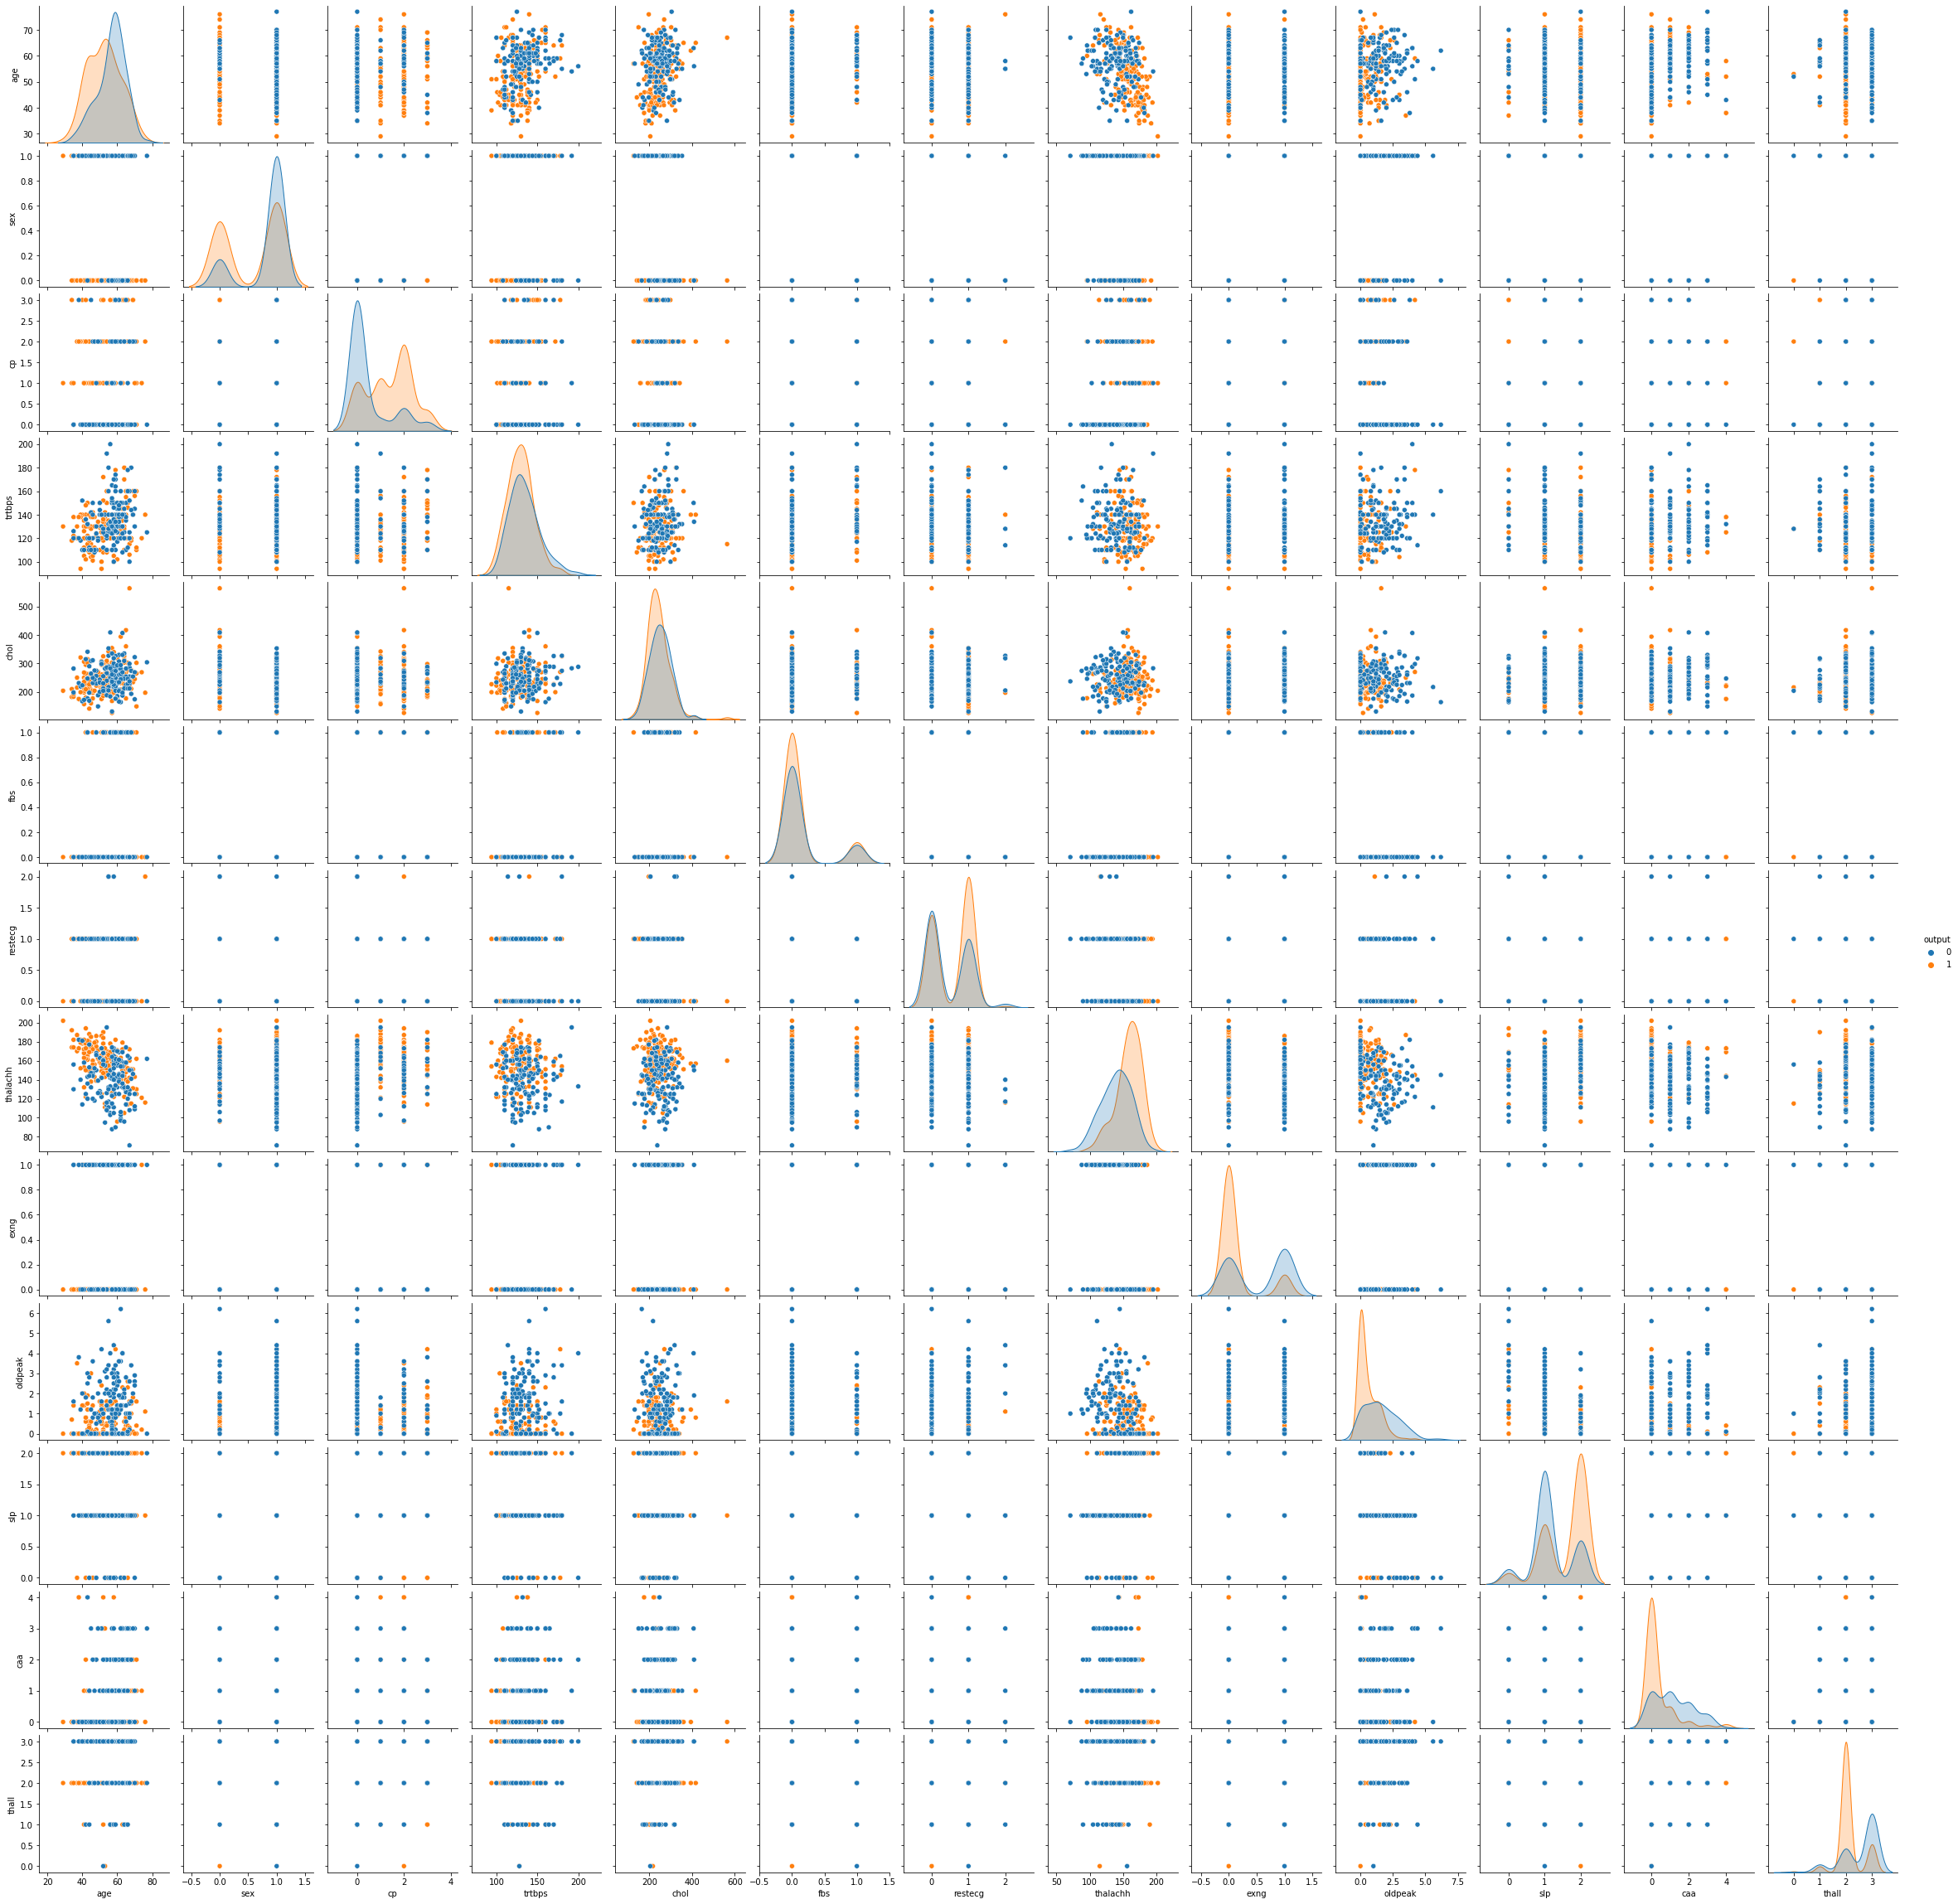

In [7]:
sns.pairplot(data,hue="output")

<AxesSubplot:>

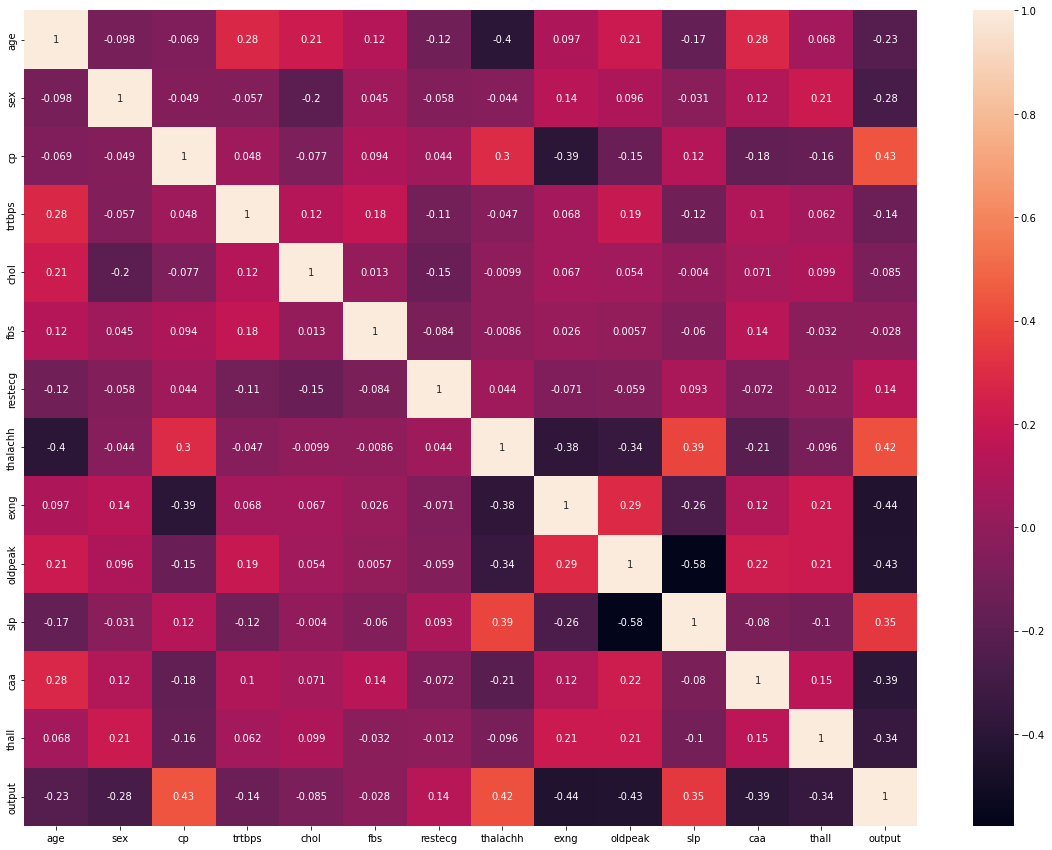

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

# Preprocessing

In [9]:
X = data.drop("output",axis=1)
Y = data.output.values

## Sclaing:
### StandardScaler

In [10]:
SS = StandardScaler()
X = SS.fit_transform(X)

In [11]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Model

### KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [13]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


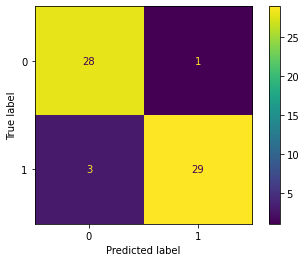

In [14]:
metrics.plot_confusion_matrix(knn,x_test,y_test)

## SVC

In [15]:
svc = SVC(C=0.5,random_state=0)
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test) 

In [16]:
print(metrics.classification_report(y_test,predict_svc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


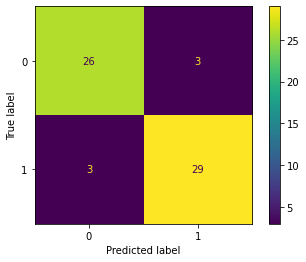

In [17]:
metrics.plot_confusion_matrix(svc,x_test,y_test)

## RandomForestClassifier

In [18]:
RF =  RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [19]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


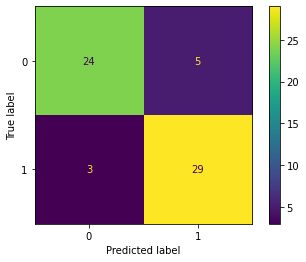

In [20]:
metrics.plot_confusion_matrix(RF,x_test,y_test)

## BernoulliNB

In [21]:
bernoulli = BernoulliNB()
bernoulli.fit(x_train,y_train)
predict_bernoulli = bernoulli.predict(x_test)

In [22]:
print(metrics.classification_report(y_test,predict_bernoulli))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


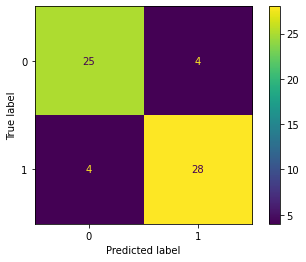

In [23]:
metrics.plot_confusion_matrix(bernoulli,x_test,y_test)

## GBoostingClassifier

In [24]:
Gboost = GradientBoostingClassifier(learning_rate=0.01,subsample=0.9,random_state=9)
Gboost.fit(x_train,y_train)
predict_gb = Gboost.predict(x_test)

In [25]:
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


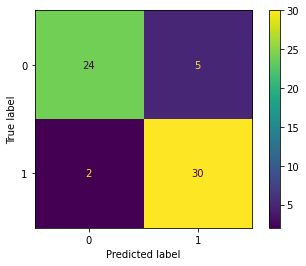

In [26]:
metrics.plot_confusion_matrix(Gboost,x_test,y_test)

### XGBoostClassifier

In [27]:
XGboost = XGBRFClassifier(learning_rate=0.01,subsample=0.1)
XGboost.fit(x_train,y_train)
predict_xb = XGboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
print(metrics.classification_report(y_test,predict_xb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


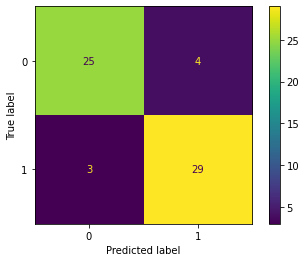

In [29]:
metrics.plot_confusion_matrix(XGboost,x_test,y_test)

## CatBoostClassifier

In [30]:
catboost = CatBoostClassifier(iterations=200,learning_rate=0.5,eval_metric="Accuracy",task_type="GPU",random_state=1)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.8719008	test: 0.7868852	best: 0.7868852 (0)	total: 12.3ms	remaining: 2.45s
1:	learn: 0.8925620	test: 0.9180328	best: 0.9180328 (1)	total: 23.6ms	remaining: 2.33s
2:	learn: 0.9256198	test: 0.8688525	best: 0.9180328 (1)	total: 33.7ms	remaining: 2.21s
3:	learn: 0.9214876	test: 0.8688525	best: 0.9180328 (1)	total: 44ms	remaining: 2.16s
4:	learn: 0.9545455	test: 0.8360656	best: 0.9180328 (1)	total: 139ms	remaining: 5.42s
5:	learn: 0.9793388	test: 0.8360656	best: 0.9180328 (1)	total: 149ms	remaining: 4.81s
6:	learn: 0.9834711	test: 0.8196721	best: 0.9180328 (1)	total: 158ms	remaining: 4.36s
7:	learn: 0.9752066	test: 0.8524590	best: 0.9180328 (1)	total: 167ms	remaining: 4.02s
8:	learn: 0.9917355	test: 0.8524590	best: 0.9180328 (1)	total: 178ms	remaining: 3.78s
9:	learn: 0.9958678	test: 0.8524590	best: 0.9180328 (1)	total: 189ms	remaining: 3.59s
10:	learn: 1.0000000	test: 0.8688525	best: 0.9180328 (1)	total: 198ms	remaining: 3.4s
11:	learn: 1.0000000	test: 0.8524590	best: 0.9180328

In [31]:
catboost.best_score_

{'learn': {'Accuracy': 1.0, 'Logloss': 0.001655932300346942},
 'validation': {'Accuracy': 0.9180327868852459, 'Logloss': 0.3697241798776095}}

In [32]:
predict_cat = catboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


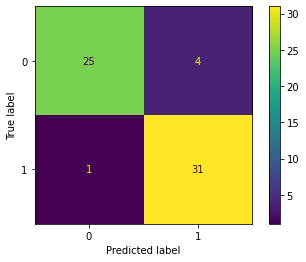

In [33]:
metrics.plot_confusion_matrix(catboost,x_test,y_test)

In [34]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn),'Recall': metrics.recall_score(y_test,predict_knn),'F1-score': metrics.f1_score(y_test,predict_knn)},
       {"Algorithm":"SVM", 'Accuracy': metrics.accuracy_score(y_test,predict_svc),'Precision': metrics.precision_score(y_test,predict_svc),'Recall': metrics.recall_score(y_test,predict_svc),'F1-score': metrics.f1_score(y_test,predict_svc)},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_rf),'Precision': metrics.precision_score(y_test,predict_rf),'Recall': metrics.recall_score(y_test,predict_rf),'F1-score': metrics.f1_score(y_test,predict_rf)},
        {"Algorithm":"BernoulliNB", 'Accuracy': metrics.accuracy_score(y_test,predict_bernoulli),'Precision': metrics.precision_score(y_test,predict_bernoulli),'Recall': metrics.recall_score(y_test,predict_bernoulli),'F1-score': metrics.f1_score(y_test,predict_bernoulli)},
        {"Algorithm":"Gboost",'Accuracy': metrics.accuracy_score(y_test,predict_gb),'Precision': metrics.precision_score(y_test,predict_gb),'Recall': metrics.recall_score(y_test,predict_gb),'F1-score': metrics.f1_score(y_test,predict_gb)},
        {"Algorithm":"XGboost",'Accuracy': metrics.accuracy_score(y_test,predict_xb),'Precision': metrics.precision_score(y_test,predict_xb),'Recall': metrics.recall_score(y_test,predict_xb),'F1-score': metrics.f1_score(y_test,predict_xb)},
        {"Algorithm":"Catboost",'Accuracy': metrics.accuracy_score(y_test,predict_cat),'Precision': metrics.precision_score(y_test,predict_cat),'Recall': metrics.recall_score(y_test,predict_cat),'F1-score': metrics.f1_score(y_test,predict_cat)}
       ] 

In [35]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.934426,0.966667,0.90625,0.935484
1,SVM,0.901639,0.906250,0.90625,0.906250
2,RandomForest,0.868852,0.852941,0.90625,0.878788
3,BernoulliNB,0.868852,0.875000,0.87500,0.875000
4,Gboost,0.885246,0.857143,0.93750,0.895522
5,XGboost,0.885246,0.878788,0.90625,0.892308
6,Catboost,0.918033,0.885714,0.96875,0.925373
